## Optimization Algorithms for Cost Functions
A cost function is a measure of how similar a prediction of a value and the actual value are. Usually, we are looking to find the set of parameters that lead to the smallest possible cost. A small cost would then imply that your algorithm will perform well. The smallest cost possible of a function is known as the minima. Sometimes a cost function can have multiple local minima. Fortunately, with very high dimensional parameter spaces, local minima do not occur very often because it would imply that every parameter is concave at the same time. This is typically not the case, and so we are left with alot of saddles instead of minima.

Algorithms that find the set of parameters that lead to the minima are known as optimization algorithms. As the algorithms increase in complexity, we'll see that they tend to try to get to the minima more efficiently. The one's we'll discuss in this post include:

- Stochastic Gradient Descent
- Weighted Exponential Moving Averages
- Momentum
- RMSProp
- The Adam Algorithms





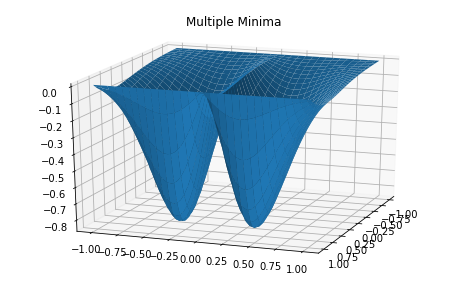

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(8, 5), 
                        subplot_kw={'projection': '3d'})
alpha = 1
r = np.linspace(-alpha,alpha,60)
X,Y= np.meshgrid(r,r)

l = -abs(-2*Y*(1-X**2)*np.exp(-.3333*X**3+2*X-4*Y**2)) # Two minima

ax1.plot_surface(X,Y,l)
ax1.set_title("Multiple Minima")
ax1.view_init(20, 20)
plt.show()    

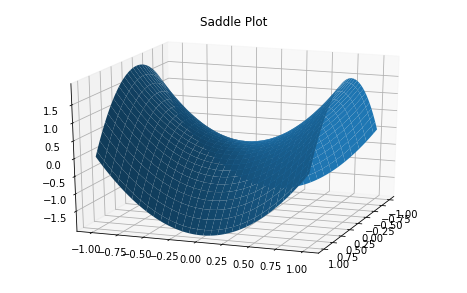

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(8, 5), 
                        subplot_kw={'projection': '3d'})
alpha = 1
r = np.linspace(-alpha,alpha,60)
X,Y= np.meshgrid(r,r)

l = -4*(((X**2)/2)-((Y**2)/2)) # Saddle

ax1.plot_surface(X,Y,l)
ax1.set_title("Saddle Plot")
ax1.view_init(20, 20)
plt.show()


# Stochastic Gradient Descent
If youve seen my "Logistic Regression Made Easy" post then we've already seen an example of how stochastic gradient descent works. If you look up Stochastic Gradient Descent (SGD) you will most likely come across an equation that looks like this:

\begin{equation} \theta = \theta - \alpha*\frac{dJ(\theta)}{d\theta}\end{equation}

They'll tell you that theta is the parameter you're trying to find the optimum value that minimizes J. J here is reffered to as the objective function. Finally we have the learning rate which is labeled as alpha. They'll tell you to repeatedly evaluate this function until you reach the desired cost.

What does it mean? Think for a second that youre sitting on sled at the top of one hill, looking out towards another hill. If you slide down the hill, you will naturally move down it until you eventually come to a rest at the bottom. If the first hill is steep enough, you might start going up the side of the next hill. In this analogy you can think of:

\begin{align} \theta & : \text{As position on the hill}\\\\ 
\frac{dJ(\theta)}{d\theta} & : \text{As Steepness at point theta} \\\\ \alpha & : \text{As } \frac{1}{friction}\end{align}

A high learning rate would imply low friction and therefore the sled would zoom along the hill as if on ice. A low learning rate would imply high friction, and so the sled would move struggle down the hill as if made of carpet. How do we simulate this effect with something like the equation above?

** Stochastic Gradient Descent **
1. Initialize parameters (thetas, learning rate)
2. Compute the gradient at each theta
3. Update Parameters
4. Repeat steps 2 and 3 until cost stablizes

Lets come up with a simple example to see how this works!

here we see an objective function and its derivative (gradient):

\begin{align} J(\theta)  & = \frac{cos(3\pi\theta)}{\theta} \\\\ dJ(\theta) & = -\frac{3\pi sin(3\pi\theta)}{\theta}-\frac{cos(3\pi\theta)}{\theta^2}\end{align}

we can generate a plot of the function and 1/30th its gradient with the code below

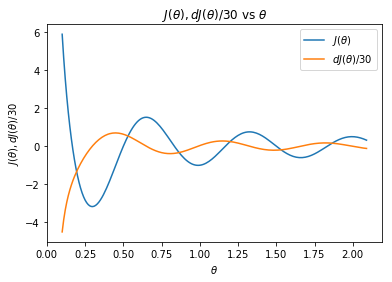

In [4]:
import numpy as np

def minimaFunction(theta):
    return np.cos(3*np.pi*theta)/theta

def minimaFunctionDerivative(theta):
    const1 = 3*np.pi
    const2 = const1*theta
    return -(const1*np.sin(const2)/theta)-np.cos(const2)/theta**2

theta = np.arange(.1,2.1,.01)
Jtheta = minimaFunction(theta)
dJtheta = minimaFunctionDerivative(theta)

plt.plot(theta,Jtheta,label = r'$J(\theta)$')
plt.plot(theta,dJtheta/30,label = r'$dJ(\theta)/30$')
plt.legend()
axes = plt.gca()
#axes.set_ylim([-10,10])

plt.ylabel(r'$J(\theta),dJ(\theta)/30$')
plt.xlabel(r'$\theta$')
plt.title(r'$J(\theta),dJ(\theta)/30 $ vs $\theta$')
plt.show()

Two things stand out in the plot above. First, notice how this cost function has a few minima (around .25,1.0, and 1.7). Second, notice how the derivative is equal to zero at the minima and large at the inflection points. This characteristic is what we will take advantage of in SGD.

We can see an implementation of the four steps above in the following code. It will also generate a video that shows the value of theta and and the gradient at each step.

In [ ]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def optimize(iterations, oF, dOF,params,learningRate):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)
        # Compute the update
        params = params-learningRate*dParams
        
        # app end the new parameters
        oParams.append(params)    
            
    return np.array(oParams)


def minimaFunction(theta):
    return np.cos(3*np.pi*theta)/theta

def minimaFunctionDerivative(theta):
    const1 = 3*np.pi
    const2 = const1*theta
    return -(const1*np.sin(const2)/theta)-np.cos(const2)/theta**2

theta = .6
iterations=45
learningRate = .0007
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               theta,\
                               learningRate)

# Plot the original function
thetaR = np.arange(.1,2.1,.01)
Jtheta = minimaFunction(thetaR)

# plot the function at the parameter point ontop of the function
JOptiTheta = minimaFunction(optimizedParameters)

# Create the animation
fig, ax = plt.subplots()
line, = ax.plot(thetaR,Jtheta)
axes = plt.gca()
axes.set_ylim([-4,6])
axes.set_xlim([0,2])

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    line, = ax.plot(optimizedParameters[i],JOptiTheta[i],'ob')  # update the data
    plt.title(r'Updating $\theta$ through SGD $\theta$ = %f J($\theta$) = %f' %(optimizedParameters[i],JOptiTheta[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('sgd1.mp4', writer=writer)




That seems to work pretty well! You should notice that if the initial value of theta is larger, the optimization algorithm will wind up in one of the other local minima. However, as mentioned above, the change of a local minima existing in an extremely high dimensional space is unlikely beause it would require all parameters to be concave at the same time.

You might wonder, "What happens if our learning rate is too large?". If the step size is too large, then the algorithm might never find the optimal as seen in the animation below. Its important to monitor the cost function and make sure that it is generally monotonically decreasing. If its not, you may find that you have to decrease the learning rate.

In [ ]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def optimize(iterations, oF, dOF,params,learningRate):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)
        # Compute the update
        params = params-learningRate*dParams
        
        # app end the new parameters
        oParams.append(params)    
            
    return np.array(oParams)


def minimaFunction(theta):
    return np.cos(3*np.pi*theta)/theta

def minimaFunctionDerivative(theta):
    const1 = 3*np.pi
    const2 = const1*theta
    return -(const1*np.sin(const2)/theta)-np.cos(const2)/theta**2

theta = .6
iterations=45
learningRate = .01
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               theta,\
                               learningRate)

# Plot the original function
thetaR = np.arange(.1,2.1,.01)
Jtheta = minimaFunction(thetaR)

# plot the function at the parameter point ontop of the function
JOptiTheta = minimaFunction(optimizedParameters)

# Create the animation
fig, ax = plt.subplots()
line, = ax.plot(thetaR,Jtheta)
axes = plt.gca()
axes.set_ylim([-4,6])
axes.set_xlim([0,2])

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    line, = ax.plot(optimizedParameters[i],JOptiTheta[i],'ob')  # update the data
    plt.title(r'Updating $\theta$ through SGD $\theta$ = %f J($\theta$) = %f' %(optimizedParameters[i],JOptiTheta[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('sgdLRTooBig.mp4', writer=writer)

SGD also works in the case of multi variate parameter spaces. We can plot a 2d function as a contour plot. Here you can see the SGD work on an assymetric bowl function.

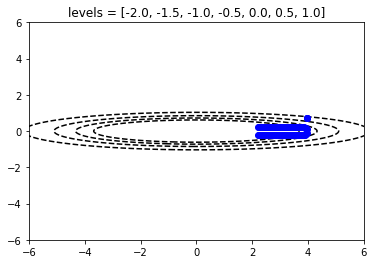

In [59]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.animation as animation

def minimaFunction(params):
    #Bivariate Normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
     
    Z1 = mlab.bivariate_normal(X, Y, sigma11,sigma12,mu11,mu12)
    
    Z = Z1
    
    return -40*Z

def minimaFunctionDerivative(params):
    # Derivative of the bivariate normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
    
    dZ1X = -scipy.stats.norm.pdf(X, mu11, sigma11)*(mu11 - X)/sigma11**2
    dZ1Y = -scipy.stats.norm.pdf(Y, mu12, sigma12)*(mu12 - Y)/sigma12**2

    return (dZ1X,dZ1Y)

def optimize(iterations, oF, dOF,params,learningRate):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    #vdw     = (0.0,0.0)
    #beta = .9
    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)
        
        # Compute the update params-learningRate*dParams
        #vdw = tuple([vDW*beta+(1.0-beta)*dPar for dPar,vDW in zip(dParams,vdw)])
        
        #SGD in this line Gpes through each parameter and applies parameter = parameter -learningrate*dParameter
        params = tuple([par-learningRate*dPar for dPar,par in zip(dParams,params)])
        
        # append the new parameters
        oParams.append(params)    
            
    return oParams



iterations=100
learningRate = .4
#learningRate = (.4,.4)
x,y = 4.0,1.0
params = (x,y)
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               params,\
                               learningRate)

delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
params = (X,Y)

Z       = minimaFunction(params)

dZX,dZY = minimaFunctionDerivative(params)

levels = np.arange(-2.0,1.5,0.5)

#plt.clabel(ax, inline=1, fontsize=10)
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.title('levels = {}'.format(levels.tolist()))
plt.show()

# Create the animation
fig, ax = plt.subplots()
line = plt.contour(X, Y, Z, levels=levels,colors='k')
axes = plt.gca()
plt.xlim([-6,6])
plt.ylim([-6,6])

JOptiTheta = [minimaFunction(i) for i in optimizedParameters]

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    tup = optimizedParameters[i]

    line, = ax.plot(tup[0],tup[1],'ob')  # update the data
    #plt.title(r'Updating $\theta$ through SGD $\theta$ = %f' %(optimizedParameters[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('multiVariateSGD.mp4', writer=writer)

# Stochastic Gradient Descent With Momentum
There is one caveate that traditional SGD does not address. Typically, users want to use very large learning rates to quickly learn the parameters of interest. Unfortunately, when the cost surface is narrow, this can lead to instability. You can see that in the form of the thrashing in the y parameter direction in the previous video coupled with the lack of horizontal progress towards the minima. Momentum attempts to address this problem by making predictions that are informed by past gradients. Typically, SGD with Momentum updates parameters with the following equation:

\begin{align} vdw & = \gamma*vdw + \nu*\frac{dJ(\theta)}{d\theta} \\\\ 
           \theta & = \theta - \alpha*vdw\end{align}

The gamma and nu values allow the user to weight the previous value of theta and dJ(theta) to determine the new value of theta. It is pretty common for people to select values for gamma and nu to create an exponential weighted moving average as follows:

\begin{align} vdw & = \beta*vdw + (1-\beta)*\frac{dJ(\theta)}{d\theta} \\\\ 
           \theta & = \theta - \alpha*vdw\end{align}
           
Selecting a value of betta equal to 1/t allows the user to more strongly consider the last t values of vdw. This simple change in the optimization can create dramatic results! We can now use a much larger learning rate and converge on the solution in a fraction of the time!



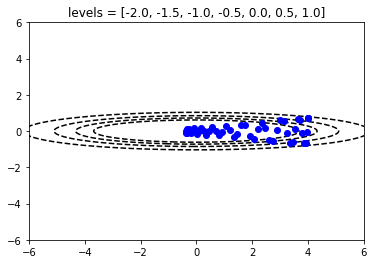

In [101]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.animation as animation

def minimaFunction(params):
    #Bivariate Normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
     
    Z1 = mlab.bivariate_normal(X, Y, sigma11,sigma12,mu11,mu12)
    
    Z = Z1
    
    return -40*Z

def minimaFunctionDerivative(params):
    # Derivative of the bivariate normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
    
    dZ1X = -scipy.stats.norm.pdf(X, mu11, sigma11)*(mu11 - X)/sigma11**2
    dZ1Y = -scipy.stats.norm.pdf(Y, mu12, sigma12)*(mu12 - Y)/sigma12**2

    return (dZ1X,dZ1Y)

def optimize(iterations, oF, dOF,params,learningRate,beta):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    vdw     = (0.0,0.0)

    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)
        
        # Compute the update params-learningRate*dParams
        vdw = tuple([vDW*beta+(1.0-beta)*dPar for dPar,vDW in zip(dParams,vdw)])
        
        #SGD in this line Gpes through each parameter and applies parameter = parameter -learningrate*dParameter
        params = tuple([par-learningRate*dPar for dPar,par in zip(vdw,params)])
        
        # append the new parameters
        oParams.append(params)    
            
    return oParams



iterations=50
learningRate = 6.3
beta = .9
#learningRate = (.4,.4)
x,y = 4.0,1.0
params = (x,y)
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               params,\
                               learningRate,\
                               beta)

delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
params = (X,Y)

Z       = minimaFunction(params)

dZX,dZY = minimaFunctionDerivative(params)

levels = np.arange(-2.0,1.5,0.5)

#plt.clabel(ax, inline=1, fontsize=10)
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.title('levels = {}'.format(levels.tolist()))
plt.show()

# Create the animation
fig, ax = plt.subplots()
line = plt.contour(X, Y, Z, levels=levels,colors='k')
axes = plt.gca()
plt.xlim([-6,6])
plt.ylim([-6,6])

JOptiTheta = [minimaFunction(i) for i in optimizedParameters]

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    tup = optimizedParameters[i]

    line, = ax.plot(tup[0],tup[1],'ob')  # update the data
    #plt.title(r'Updating $\theta$ through SGD $\theta$ = %f' %(optimizedParameters[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('multiVariateSGDWithMomentum.mp4', writer=writer)

# RMSProp
Like everything in engineering, we're always striving to do better. RMS prop tries to improve on the momentum function by observing that the gradient of the function with respect to each parameter will be relatively large or small to one another. Because of this, we are able take a weighted exponential moving average of the square of each gradient and normalize the gradient descent function proportinally. Parameters with large gradients will become much larger than parameters with small gradients and allow a smooth descent to the optimal value. This can be seen in the following equation:

\begin{align} sdw & = \beta*sdw + (1-\beta)*\frac{dJ(\theta)}{d\theta}^2 \\\\ 
           \theta & = \theta - \frac{\alpha*\frac{dJ(\theta)}{d\theta}}{\sqrt{sdw}+eps}\end{align}
           
Note that the epsilon here is added for numerical stability and can take on values of 10e-7. What does this look like?

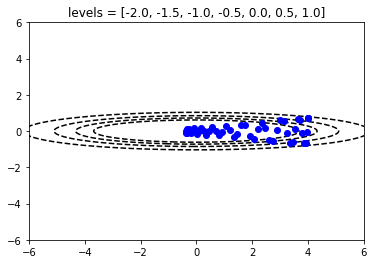

In [102]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.animation as animation

def minimaFunction(params):
    #Bivariate Normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
     
    Z1 = mlab.bivariate_normal(X, Y, sigma11,sigma12,mu11,mu12)
    
    Z = Z1
    
    return -40*Z

def minimaFunctionDerivative(params):
    # Derivative of the bivariate normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
    
    dZ1X = -scipy.stats.norm.pdf(X, mu11, sigma11)*(mu11 - X)/sigma11**2
    dZ1Y = -scipy.stats.norm.pdf(Y, mu12, sigma12)*(mu12 - Y)/sigma12**2

    return (dZ1X,dZ1Y)

def optimize(iterations, oF, dOF,params,learningRate,beta):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    sdw     = (0.0,0.0)
    eps = 10**(-7)
    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)
        
        # Compute the update params-learningRate*dParams
        sdw = tuple([sDW*beta+(1.0-beta)*dPar**2 for dPar,sDW in zip(dParams,sdw)])
        
        #SGD in this line Gpes through each parameter and applies parameter = parameter -learningrate*dParameter
        params = tuple([par-learningRate*dPar/((sDW**.5)+eps) for sDW,par,dPar in zip(sdw,params,dParams)])
        
        # append the new parameters
        oParams.append(params)    
            
    return oParams



iterations=10
learningRate = .3
beta = .9
#learningRate = (.4,.4)
x,y = 5.0,1.0
params = (x,y)
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               params,\
                               learningRate,\
                               beta)

delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
params = (X,Y)

Z       = minimaFunction(params)

dZX,dZY = minimaFunctionDerivative(params)

levels = np.arange(-2.0,1.5,0.5)

#plt.clabel(ax, inline=1, fontsize=10)
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.title('levels = {}'.format(levels.tolist()))
plt.show()

# Create the animation
fig, ax = plt.subplots()
line = plt.contour(X, Y, Z, levels=levels,colors='k')
axes = plt.gca()
plt.xlim([-6,6])
plt.ylim([-6,6])

JOptiTheta = [minimaFunction(i) for i in optimizedParameters]

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    tup = optimizedParameters[i]

    line, = ax.plot(tup[0],tup[1],'ob')  # update the data
    #plt.title(r'Updating $\theta$ through SGD $\theta$ = %f' %(optimizedParameters[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('multiVariateSGDWithRMSProp.mp4', writer=writer)

# Adam Algorithm

The Adam Algorithm combines the notions of momentum and RMSProp into one algorithm to get the best of both worlds. 
           
\begin{align} vdw & = \beta_1*vdw + (1-\beta_1)*\frac{dJ(\theta)}{d\theta} \\\\          sdw & = \beta_2*sdw + (1-\beta_2)*\frac{dJ(\theta)}{d\theta}^2 \\\\ 
      vdw^{corr} & = \frac{vdw}{1-\beta_1^t}, \text{ } sdw^{corr} = \frac{sdw}{1-\beta_2^t} \\\\
           \theta & = \theta - \frac{\alpha*vdw^{corr}}{\sqrt{sdw^{corr}}+eps}\end{align}

(5.0, 1.0)
(4.9997499689363609, 0.97161319153630499)
(4.9994999214827285, 0.94134045113607812)
(4.9992498578247506, 0.90899477345867319)
(4.9989997781470299, 0.87437357459257459)
(4.9987496826327069, 0.83726181197253891)
(4.9984995714630509, 0.797438276262596)
(4.9982494448170662, 0.75468654796345791)
(4.9979993028711194, 0.70881237623064131)
(4.9977491457985819, 0.6596691270124343)
(4.9974989737694946, 0.60719196469290404)
(4.9972487869502631, 0.55143889324231454)
(4.9969985855033707, 0.49263215383396558)
(4.9967483695871229, 0.43118721699146856)
(4.9964981393554186, 0.36771134718078946)
(4.9962478949575519, 0.30295443309876957)
(4.9959976365380392, 0.23770582690890796)
(4.9957473642364771, 0.17265010019390503)
(4.9954970781874302, 0.10821022076605991)
(4.9952467785203423, 0.044404694871693989)
(4.9949964653594785, -0.019278736172366556)
(4.9947461388238912, -0.084031217435049307)
(4.994495799027411, -0.15199553124938459)
(4.9942454460786614, -0.22692440430681762)
(4.9939950800810919,

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:61: RuntimeWarning: invalid value encountered in double_scalars


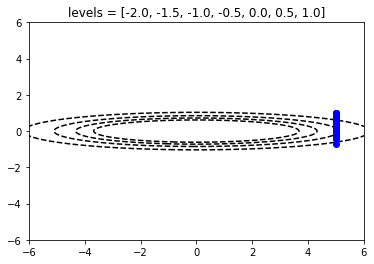

In [99]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.animation as animation

def minimaFunction(params):
    #Bivariate Normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
     
    Z1 = mlab.bivariate_normal(X, Y, sigma11,sigma12,mu11,mu12)
    
    Z = Z1
    
    return -40*Z

def minimaFunctionDerivative(params):
    # Derivative of the bivariate normal function
    X,Y = params
    
    sigma11,sigma12,mu11,mu12 = (3.0,.5,0.0,0.0)
    
    dZ1X = -scipy.stats.norm.pdf(X, mu11, sigma11)*(mu11 - X)/sigma11**2
    dZ1Y = -scipy.stats.norm.pdf(Y, mu12, sigma12)*(mu12 - Y)/sigma12**2

    return (dZ1X,dZ1Y)

def optimize(iterations, oF, dOF,params,learningRate,beta1,beta2):
    """
    computes the optimal value of params for a given objective function and its derivative
    Arguments:
        - iteratoins - the number of iterations required to optimize the objective function
        - oF - the objective function
        - dOF - the derivative function of the objective function
        - params - the parameters of the function to optimize
        - learningRate - the learning rate
    Return:
        - oParams - the list of optimized parameters at each step of iteration
    """ 
    oParams = [params]
    vdw     = (0.0,0.0)
    sdw     = (0.0,0.0)
    vdwCorr = (0.0,0.0)
    sdwCorr = (0.0,0.0)

    eps = 10**(-7)
    #The iteration loop
    for i in range(iterations):        
        # Compute the derivative of the parameters
        dParams = dOF(params)

        # Compute the update params-learningRate*dParams
        vdw     = tuple([vDW*beta1+(1.0-beta1)*dPar for dPar,vDW in zip(dParams,vdw)])
        sdw     = tuple([sDW*beta2+(1.0-beta2)*dPar**2.0 for dPar,sDW in zip(dParams,sdw)])
        vdwCorr = tuple([vDW/(1.0-beta1**(i+1.0)) for vDW in vdw])
        sdwCorr = tuple([sDW/(1.0-beta2**(i+1.0)) for sDW in sdw])
        
        #SGD in this line Gpes through each parameter and applies parameter = parameter -learningrate*dParameter
        params = tuple([par-learningRate*vdwCORR/((sdwCORR**.5)+eps) for sdwCORR,vdwCORR,par in zip(vdwCorr,sdwCorr,params)])
        
        # append the new parameters
        oParams.append(params)    
            
    return oParams



iterations=100
learningRate = .1
beta1 = .9
beta2 = .999
x,y = 5.0,1.0
params = (x,y)
optimizedParameters = optimize(iterations,\
                               minimaFunction,\
                               minimaFunctionDerivative,\
                               params,\
                               learningRate,\
                               beta1,\
                               beta2)

delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
params = (X,Y)

Z       = minimaFunction(params)

dZX,dZY = minimaFunctionDerivative(params)

levels = np.arange(-2.0,1.5,0.5)

#plt.clabel(ax, inline=1, fontsize=10)
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.title('levels = {}'.format(levels.tolist()))
plt.show()

# Create the animation
fig, ax = plt.subplots()
line = plt.contour(X, Y, Z, levels=levels,colors='k')
axes = plt.gca()
plt.xlim([-6,6])
plt.ylim([-6,6])

JOptiTheta = [minimaFunction(i) for i in optimizedParameters]

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# Animate the updates
def animate(i):
    tup = optimizedParameters[i]

    line, = ax.plot(tup[0],tup[1],'ob')  # update the data
    #plt.title(r'Updating $\theta$ through SGD $\theta$ = %f' %(optimizedParameters[i]))
    return line,


ani = animation.FuncAnimation(fig, animate, np.arange(1, iterations),
                              interval=1, blit=True)

ani.save('multiVariateSGDWithAdamAlgorithm.mp4', writer=writer)